In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

stock = "GOOG"
data = pd.read_csv(f'./data/{stock}_daily_adjusted.csv',header=0, index_col=0, parse_dates=[0], thousands=',')
data= data.sort_index(ascending=True)


data['Direction'] = (data['Adjusted Close'].shift(-1) > data['Adjusted Close']).astype(int)  # 1 for up, 0 for down

# Create features
data['SMA_10'] = data['Close'].rolling(10).mean()
data['RSI'] = 100 - (100 / (1 + data['Close'].pct_change().rolling(14).apply(
    lambda x: (x[x > 0].sum() / abs(x[x < 0].sum())), raw=True)))
data['Volatility'] = data['Close'].rolling(10).std()

# Drop rows with NaNs
data = data.dropna()

# Define features and target
X = data[['Adjusted Close', 'SMA_10', 'RSI', 'Volatility']]  # Example features
y = data['Direction']


# Train-test split (time-aware)
X_train, X_test = X[:-200], X[-200:]
y_train, y_test = y[:-200], y[-200:]

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Directional accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Directional Accuracy: {accuracy * 100:.2f}%")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [06:37:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Directional Accuracy: 49.50%


In [3]:

for i in range(10):
    data[f'lag_{i}']=data['Adjusted Close'].shift(i)
data.dropna(inplace=True)
    

In [4]:
# Define features and target
lags=[f'lag_{i}' for i in range(10)]
for i in ['Adjusted Close', 'SMA_10', 'RSI', 'Volatility']:
    lags.append(i)
X = data[lags]  # Example features
y = data['Direction']


# Train-test split (time-aware)
X_train, X_test = X[:-200], X[-200:]
y_train, y_test = y[:-200], y[-200:]

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Directional accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Directional Accuracy: {accuracy * 100:.2f}%")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [06:37:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Directional Accuracy: 60.00%


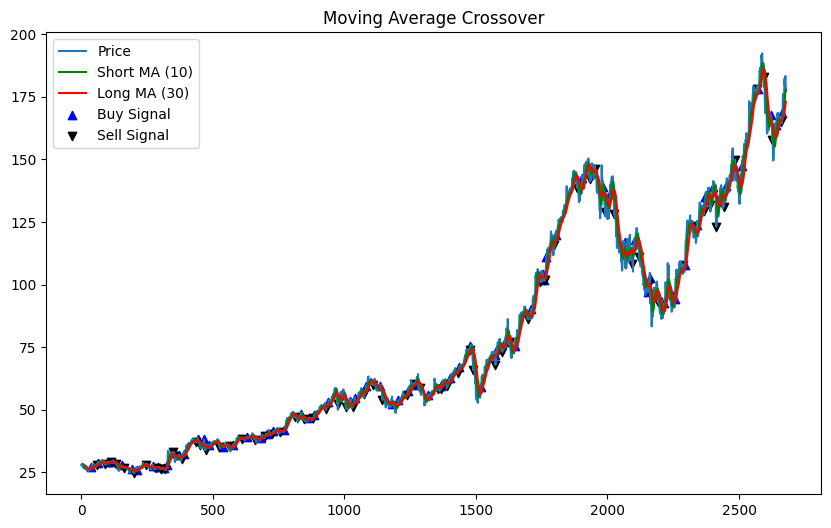

In [20]:
import matplotlib.pyplot as plt
daily_df=pd.read_csv(f'./data/{stock}_daily_adjusted.csv')
daily_df =daily_df.sort_index(ascending=False)
prices=daily_df['Adjusted Close'].values
short_ma = pd.Series(prices).rolling(window=10).mean()
long_ma = pd.Series(prices).rolling(window=20).mean()

# Identify crossovers
buy_signal = (short_ma > long_ma) & (short_ma.shift(1) <= long_ma.shift(1))
sell_signal = (short_ma < long_ma) & (short_ma.shift(1) >= long_ma.shift(1))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Price')
plt.plot(short_ma, label='Short MA (10)', color='green')
plt.plot(long_ma, label='Long MA (30)', color='red')
plt.scatter(buy_signal.index[buy_signal], prices[buy_signal], marker='^', color='blue', label='Buy Signal')
plt.scatter(sell_signal.index[sell_signal], prices[sell_signal], marker='v', color='black', label='Sell Signal')
plt.title("Moving Average Crossover")
plt.legend()
plt.show()


In [10]:
daily_df

,Date,Open,High,Low,Close,Volume
0,2024-11-14,179.750,180.445,176.030,177.35,16745947
1,2024-11-13,182.150,182.615,180.120,180.49,13969709
2,2024-11-12,181.380,184.025,180.990,183.32,14065845
3,2024-11-11,180.070,182.085,179.990,181.97,12503422
4,2024-11-08,182.000,182.350,179.570,179.86,15021549
...,...,...,...,...,...,...
95,2024-07-02,183.470,186.950,183.060,186.61,12555545
96,2024-07-01,184.480,185.340,182.730,184.49,11815862
97,2024-06-28,185.720,186.580,183.325,183.42,23032362
98,2024-06-27,185.645,187.500,185.450,186.86,13025656


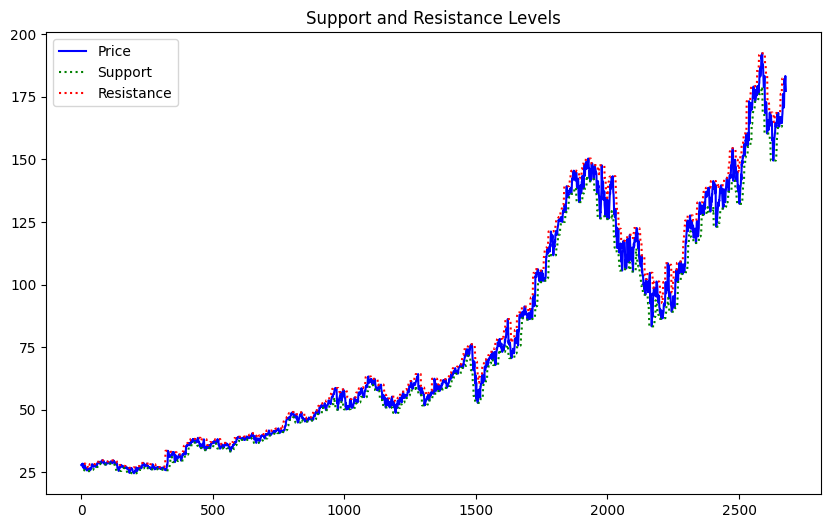

In [26]:
def identify_levels(data, window=20):
    """Identify support and resistance levels."""
    support = data.rolling(window, center=True).min()
    resistance = data.rolling(window, center=True).max()
    return support, resistance


support, resistance = identify_levels(pd.Series(prices))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Price', color='blue')
plt.plot(support, label='Support', color='green', linestyle='dotted')
plt.plot(resistance, label='Resistance', color='red', linestyle='dotted')
plt.title("Support and Resistance Levels")
plt.legend()
plt.show()


In [27]:
import talib

close_prices = np.cumsum(np.random.randn(200)) + 100

# Calculate RSI
rsi = talib.RSI(close_prices, timeperiod=14)

# Plot RSI
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label='Close Price')
plt.plot(rsi, label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title("RSI Indicator")
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'talib'

In [30]:
%pip install TA-Lib

  Using cached TA-Lib-0.5.1.tar.gz (369 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for TA-Lib: filename=ta_lib-0.5.1-cp39-cp39-macosx_10_9_universal2.whl size=1136018 sha256=238765834e08e1db0854162208680b1e528051cfe5c6298479467ad6855a0de0
  Stored in directory: /Users/manikandanperumal/Library/Caches/pip/wheels/ec/96/7e/b3014db0c128b0e04eea66fac6c3cfe1b94b6858e13d8fb2ea
Successfully built TA-Lib
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(tf.keras.layers.LSTM(50, return_sequences=False))
model.add(tf.keras.layers.Dense(25))
model.add(tf.keras.layers.Dense(1))

X_in = X.values.reshape(X.shape[0], X.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, batch_size=32, epochs=100)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform to get the original scale for predicted prices
# predictions_scaled = scaler.inverse_transform(predictions)

# # Inverse transform actual test prices
# y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

Epoch 1/100


/Users/manikandanperumal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.2969
Epoch 2/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2525
Epoch 3/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2541
Epoch 4/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2500
Epoch 5/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2513
Epoch 6/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.2498
Epoch 7/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2494
Epoch 8/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2501
Epoch 9/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2504
Epoch 10/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2520
Epoch 11/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2508
Epoch 12/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.2488
Epoch 13/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.2510
Epoch 14/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.2487
Epoch 15/100
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.2497
E

NameError: name 'scaler' is not defined

array([[0.4960396 ],
       [0.66847295],
       [0.5461287 ],
       [0.54025203],
       [0.51985115],
       [0.5157354 ],
       [0.50527513],
       [0.46815825],
       [0.59345675],
       [0.47032472],
       [0.519961  ],
       [0.48230734],
       [0.5239277 ],
       [0.5716433 ],
       [0.60853714],
       [0.45099476],
       [0.46792337],
       [0.49761653],
       [0.5339332 ],
       [0.51300025],
       [0.51399374],
       [0.5234576 ],
       [0.50524616],
       [0.5004943 ],
       [0.47923458],
       [0.50855964],
       [0.47096148],
       [0.46488267],
       [0.5355121 ],
       [0.56510425],
       [0.52509713],
       [0.5630848 ],
       [0.5395604 ],
       [0.6214434 ],
       [0.5535542 ],
       [0.50670713],
       [0.531105  ],
       [0.5423483 ],
       [0.53622186],
       [0.31940863],
       [0.5198971 ],
       [0.57458365],
       [0.56029075],
       [0.51970834],
       [0.55939054],
       [0.50332963],
       [0.5053806 ],
       [0.529

In [41]:
accuracy = accuracy_score(y_test, predictions)
print(f"Directional Accuracy: {accuracy * 100:.2f}%")

ValueError: Classification metrics can't handle a mix of binary and continuous targets